step 1: choosing a dataset - Life Expectancy (WHO)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("Life-Expectancy-Data-Updated.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Make sure the key columns are numeric
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Life_expectancy"] = pd.to_numeric(df["Life_expectancy"], errors="coerce")

# Keep only rows where we can plot
df_plot = df.dropna(subset=["Year", "Life_expectancy"]).copy()
df_plot["Year"] = df_plot["Year"].astype(int)

df['Status'] = df['Economy_status_Developed'].apply(lambda x: 'Developed' if x == 1 else 'Developing')


vacc_cols = [c for c in df.columns if any(k in c.lower() for k in ["polio", "hepatitis", "diphtheria", "measles"])]

# Calculate the average vaccination rate for each row (Country/Year)
df['avg_vaccination'] = df[vacc_cols].mean(axis=1)


C:\Users\Shir\AppData\Local\Temp\ipykernel_10044\4209254170.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


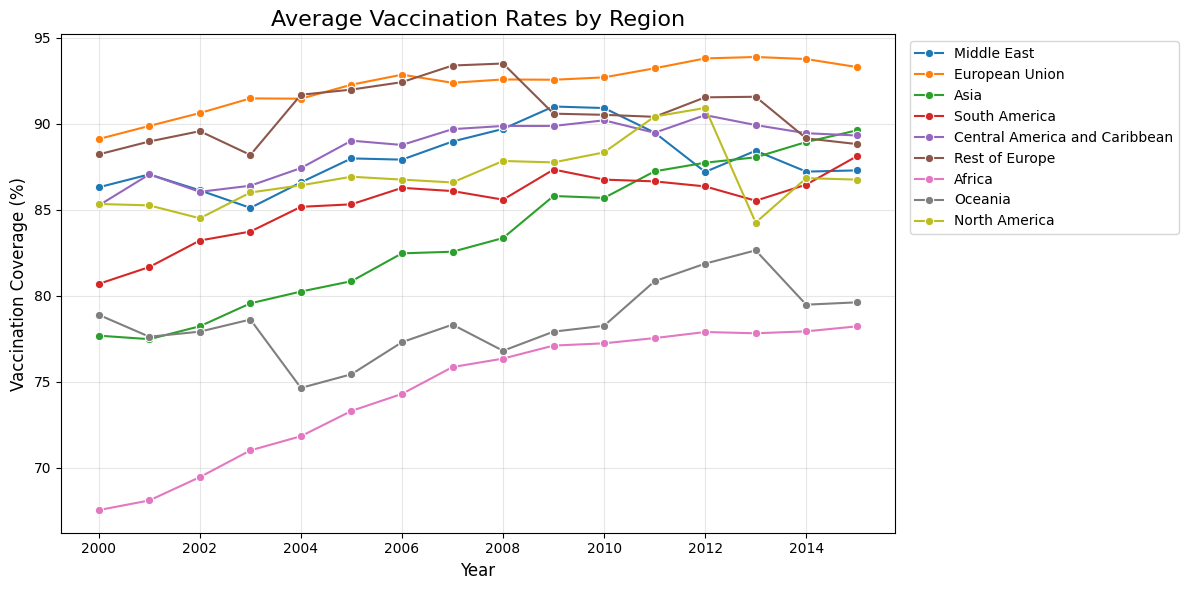

In [18]:
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df, 
    x="Year", 
    y="avg_vaccination", 
    hue="Region", 
    marker="o",
    ci=None  # Remove confidence interval shading for cleaner lines
)

plt.title("Average Vaccination Rates by Region", fontsize=16)
plt.ylabel("Vaccination Coverage (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

plt.tight_layout()
plt.show()

Correlation (Log GDP vs Vaccination):
Status             
Developed   log_GDP   -0.332358
Developing  log_GDP    0.536635
Name: avg_vaccination, dtype: float64


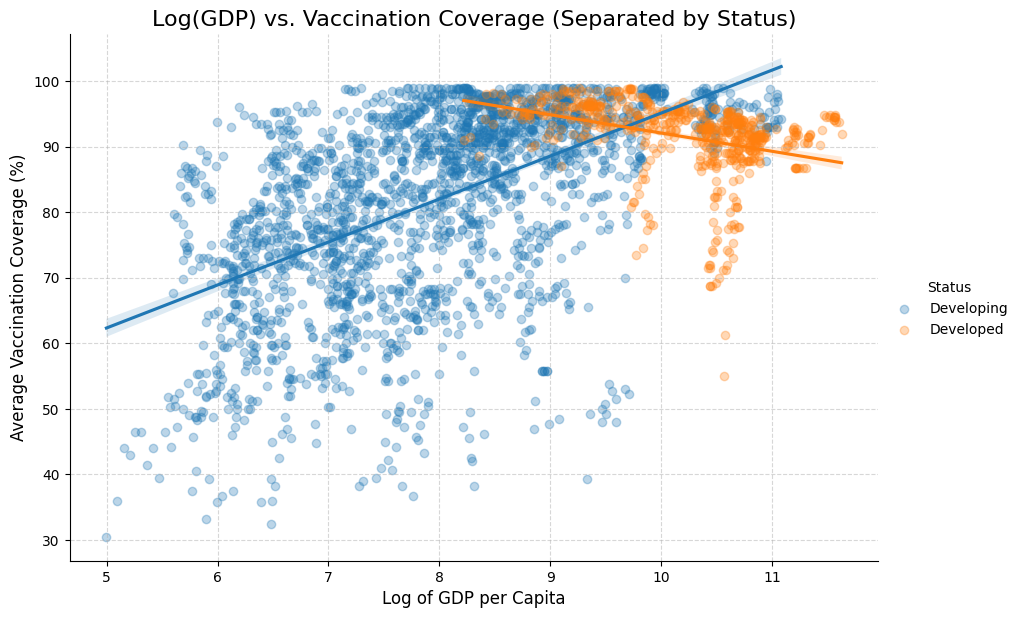

In [19]:


# Calculate Log GDP (for better visualization)
df['log_GDP'] = np.log(df['GDP_per_capita'])

# Calculate Correlations for each group
stats = df.groupby('Status')[['log_GDP', 'avg_vaccination']].corr().iloc[0::2, -1]
print("Correlation (Log GDP vs Vaccination):")
print(stats)

sns.lmplot(
    data=df, 
    x='log_GDP', 
    y='avg_vaccination', 
    hue='Status', 
    height=6, 
    aspect=1.5,
    scatter_kws={'alpha': 0.3}
)

plt.title('Log(GDP) vs. Vaccination Coverage (Separated by Status)', fontsize=16)
plt.xlabel('Log of GDP per Capita', fontsize=12)
plt.ylabel('Average Vaccination Coverage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

Correlation (Developed Countries): 0.1011


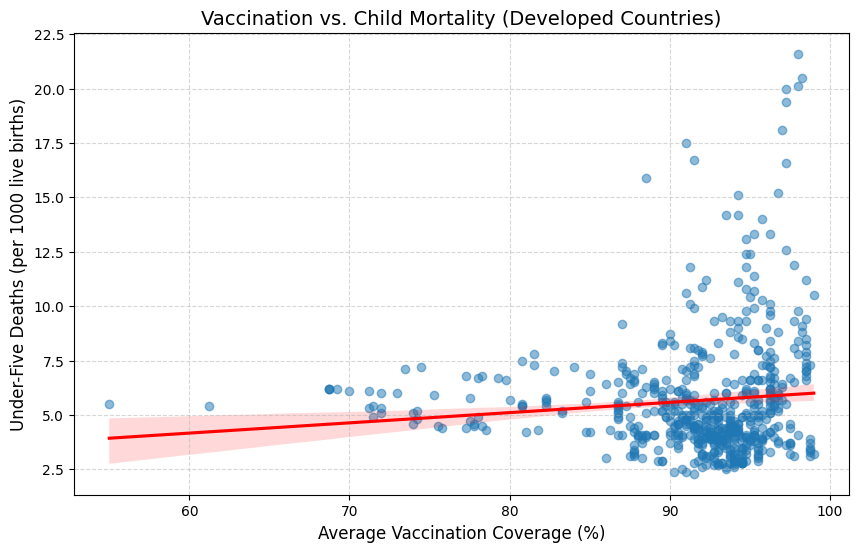

In [20]:
# Filter for Developed Countries
# The column 'Economy_status_Developed' uses 1 for Developed
developed_df = df[df['Economy_status_Developed'] == 1].copy()

# Calculate Correlation
correlation = developed_df['avg_vaccination'].corr(developed_df['Under_five_deaths'])
print(f"Correlation (Developed Countries): {correlation:.4f}")

plt.figure(figsize=(10, 6))

sns.regplot(
    data=developed_df,
    x='avg_vaccination',
    y='Under_five_deaths',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

plt.title(f'Vaccination vs. Child Mortality (Developed Countries)', fontsize=14)
plt.xlabel('Average Vaccination Coverage (%)', fontsize=12)
plt.ylabel('Under-Five Deaths (per 1000 live births)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

Correlation (Developing Countries): -0.7086


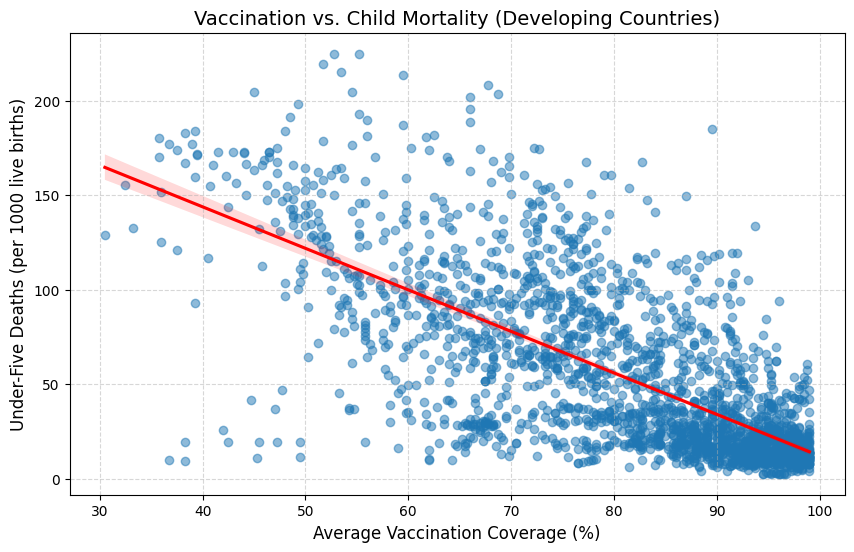

In [21]:
# Filter for Developed Countries
# The column 'Economy_status_Developing' uses 1 for Developing
developing_df = df[df['Economy_status_Developing'] == 1].copy()

# Calculate Correlation
correlation = developing_df['avg_vaccination'].corr(developing_df['Under_five_deaths'])
print(f"Correlation (Developing Countries): {correlation:.4f}")

plt.figure(figsize=(10, 6))

sns.regplot(
    data=developing_df,
    x='avg_vaccination',
    y='Under_five_deaths',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

plt.title(f'Vaccination vs. Child Mortality (Developing Countries)', fontsize=14)
plt.xlabel('Average Vaccination Coverage (%)', fontsize=12)
plt.ylabel('Under-Five Deaths (per 1000 live births)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [22]:
import pandas as pd

df_hdi = pd.read_csv("hdr_general.csv", encoding='latin1')
# Clean column names
df_hdi.columns = df_hdi.columns.str.strip()

# Make sure the key columns are numeric
df_hdi["year"] = pd.to_numeric(df_hdi["year"], errors="coerce")
df_hdi["hdi"] = pd.to_numeric(df_hdi["hdi"], errors="coerce")

# Keep only rows where we can plot
df_hdi_plot = df_hdi.dropna(subset=["year", "hdi"]).copy()
df_hdi_plot["year"] = df_hdi_plot["year"].astype(int)

df_hdi_plot = df_hdi_plot[['country', 'year', 'hdi']]

# Perform the Join
combined_df = pd.merge(
    df, 
    df_hdi_plot, 
    left_on=['Country', 'Year'], 
    right_on=['country', 'year'],
    how='inner'
)

# Check the result
print(combined_df.head())
print(len(combined_df))
print(len(df))

      Country                         Region  Year  Infant_deaths  \
0       Spain                 European Union  2015            2.7   
1       India                           Asia  2007           51.5   
2      Guyana                  South America  2006           32.8   
3      Israel                    Middle East  2012            3.4   
4  Costa Rica  Central America and Caribbean  2006            9.8   

   Under_five_deaths  Adult_mortality  Alcohol_consumption  Hepatitis_B  \
0                3.3          57.9025                10.35           97   
1               67.9         201.0765                 1.57           60   
2               40.5         222.1965                 5.68           93   
3                4.3          57.9510                 2.89           97   
4               11.2          95.2200                 4.19           88   

   Measles   BMI  ...  Schooling  Economy_status_Developed  \
0       94  26.0  ...        9.7                         1   
1       35

Correlation (HDI vs Vaccination):
Status         
Developed   hdi   -0.203720
Developing  hdi    0.667923
Name: avg_vaccination, dtype: float64


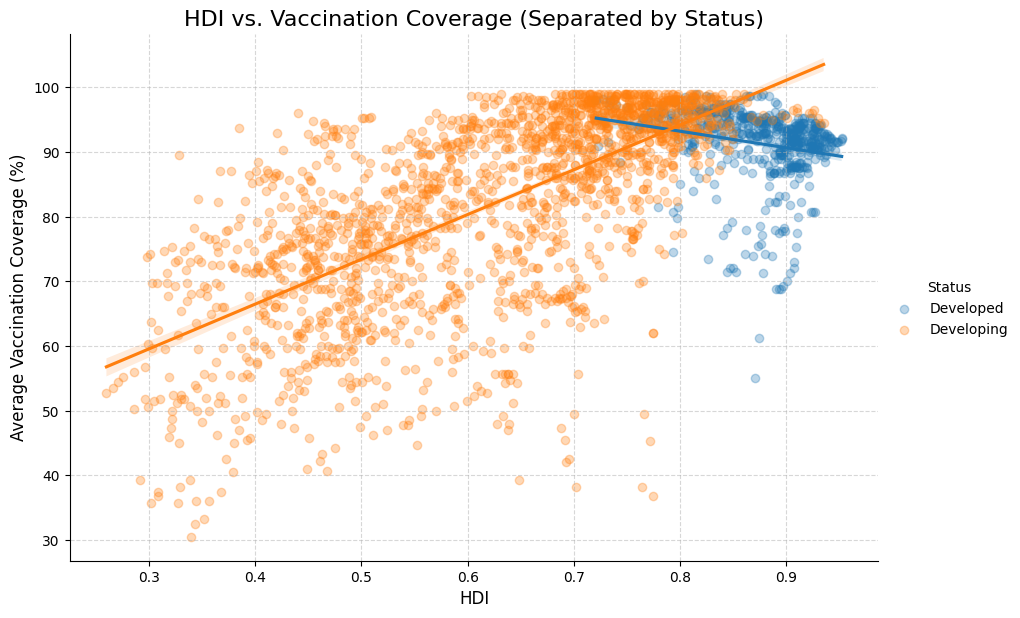

In [23]:
# Calculate Correlations for each group
stats = combined_df.groupby('Status')[['hdi', 'avg_vaccination']].corr().iloc[0::2, -1]
print("Correlation (HDI vs Vaccination):")
print(stats)

# 4. Plot
# lmplot draws scatter plots with regression lines for each 'hue' category
sns.lmplot(
    data=combined_df, 
    x='hdi', 
    y='avg_vaccination', 
    hue='Status', 
    height=6, 
    aspect=1.5,
    scatter_kws={'alpha': 0.3}
)

plt.title('HDI vs. Vaccination Coverage (Separated by Status)', fontsize=16)
plt.xlabel('HDI', fontsize=12)
plt.ylabel('Average Vaccination Coverage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

C:\Users\Shir\AppData\Local\Temp\ipykernel_10044\1996287933.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g['hdi'].corr(g['avg_vaccination']))
C:\Users\Shir\AppData\Local\Temp\ipykernel_10044\1996287933.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


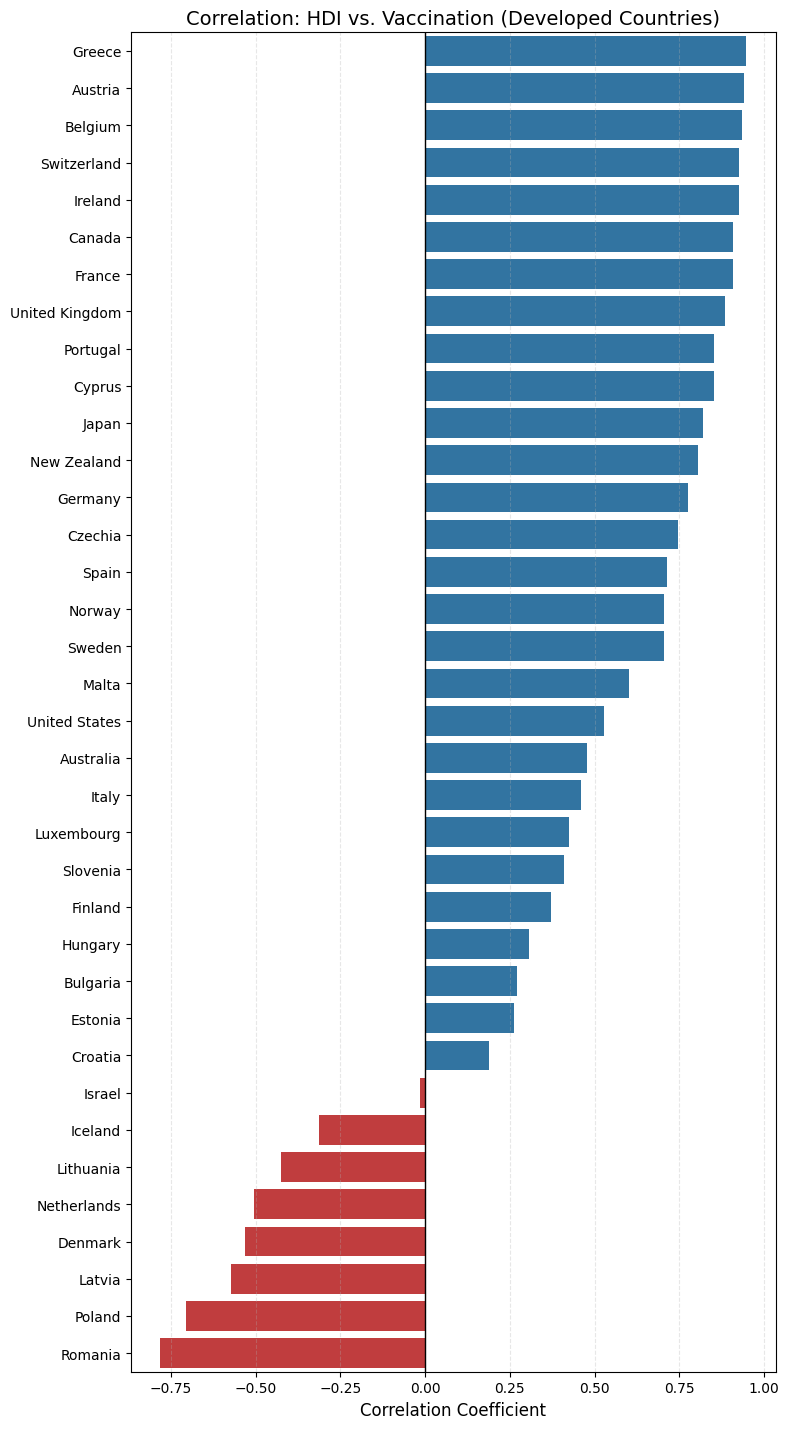

In [24]:

correlations = (
    combined_df[combined_df["Status"] == "Developed"]
    .groupby('Country')
    .apply(lambda g: g['hdi'].corr(g['avg_vaccination'])) 
    .sort_values(ascending=False)                        
    .reset_index(name='Correlation')                      
)

plt.figure(figsize=(8, len(correlations) * 0.4)) 

custom_colors = ['#1f77b4' if x > 0 else '#d62728' for x in correlations['Correlation']]

sns.barplot(
    data=correlations, 
    x='Correlation', 
    y='Country', 
    palette=custom_colors
)

plt.title('Correlation: HDI vs. Vaccination (Developed Countries)', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel(None) 
plt.axvline(0, color='black', linewidth=1) 
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

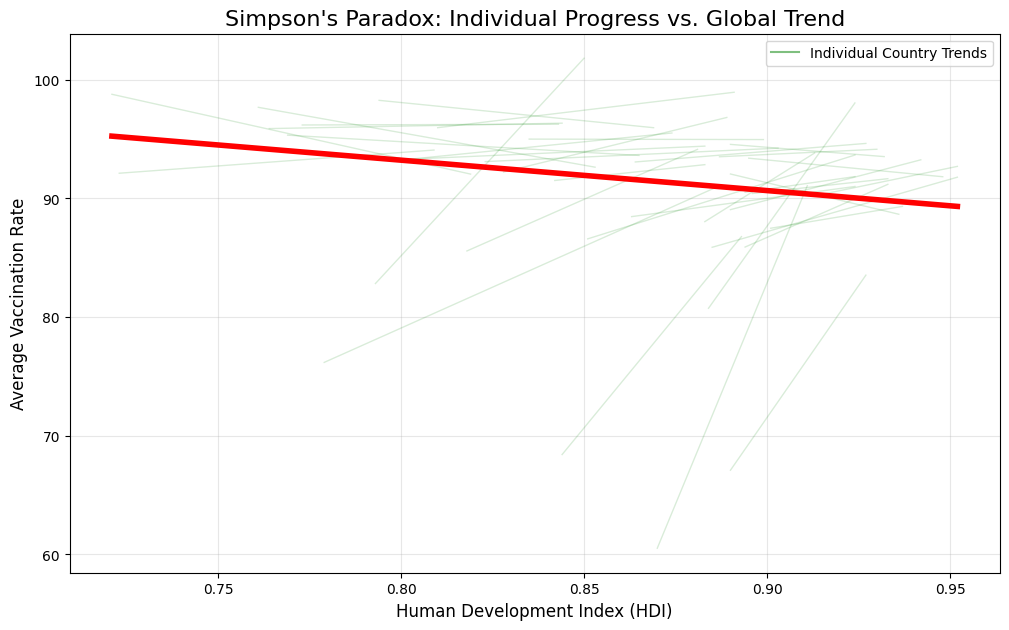

In [25]:
dev_df = combined_df[combined_df["Status"] == "Developed"].copy()

plt.figure(figsize=(12, 7))

# 2. Plot INDIVIDUAL Country Trends (The "Spaghetti")
for country in dev_df['Country'].unique():
    subset = dev_df[dev_df['Country'] == country]
    # Only plot if we have enough data points
    if len(subset) > 5:
        sns.regplot(
            x=subset['hdi'], 
            y=subset['avg_vaccination'], 
            ci=None, 
            scatter=False,    
            line_kws={'alpha': 0.15, 'color': 'green', 'linewidth': 1} 
        )

# 3. Plot the GLOBAL Trend (The "Paradox")
sns.regplot(
    data=dev_df, 
    x='hdi', 
    y='avg_vaccination', 
    scatter=False, 
    ci=None,
    line_kws={'color': 'red', 'linewidth': 4, 'label': 'Global Trend (All Data)'}
)

plt.plot([], [], color='green', alpha=0.5, label='Individual Country Trends')

plt.title("Simpson's Paradox: Individual Progress vs. Global Trend", fontsize=16)
plt.xlabel("Human Development Index (HDI)", fontsize=12)
plt.ylabel("Average Vaccination Rate", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

C:\Users\Shir\AppData\Local\Temp\ipykernel_10044\559546662.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left')


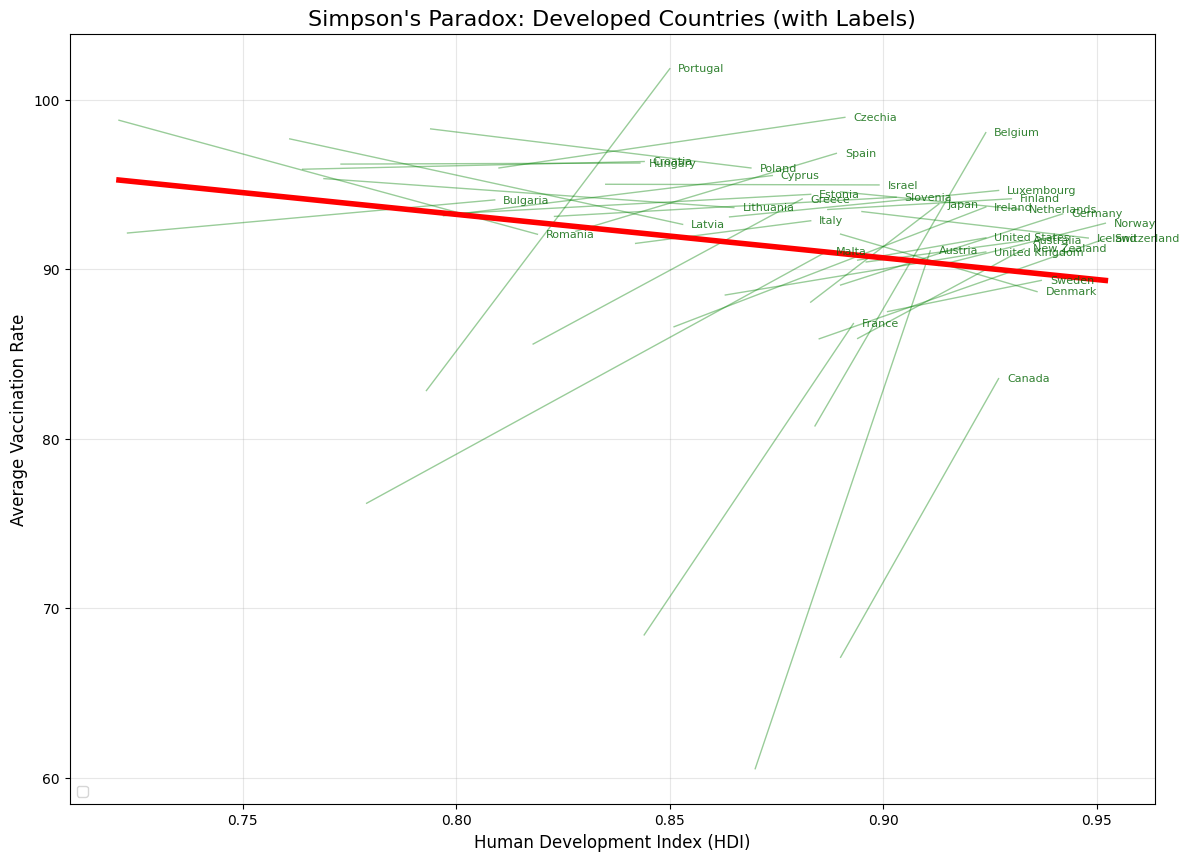

In [26]:

plt.figure(figsize=(14, 10))  # Made the plot larger to accommodate names

# 1. Plot INDIVIDUAL Country Trends with Labels
for country in dev_df['Country'].unique():
    subset = dev_df[dev_df['Country'] == country]
    
    # Only plot if we have enough data points (e.g., > 5 years)
    if len(subset) > 5:
        # Plot the faint green line
        sns.regplot(
            data=subset,
            x='hdi', 
            y='avg_vaccination', 
            ci=None, 
            scatter=False, 
            line_kws={'alpha': 0.4, 'color': 'green', 'linewidth': 1} 
        )
        
        if subset['hdi'].nunique() > 1:
            m, b = np.polyfit(subset['hdi'], subset['avg_vaccination'], 1)
            
            # Get the right-most x-value (highest HDI) for this country
            x_pos = subset['hdi'].max()
            # Calculate the corresponding y-value on the regression line
            y_pos = m * x_pos + b
            
            # Add the text label
            plt.text(
                x_pos + 0.002,  # Shift slightly right for spacing
                y_pos, 
                country, 
                color='darkgreen', 
                fontsize=8, 
                alpha=0.8,
                verticalalignment='center'
            )

# 2. Plot the GLOBAL Trend (The "Paradox")
sns.regplot(
    data=dev_df, 
    x='hdi', 
    y='avg_vaccination', 
    scatter=False, 
    ci=None,
    line_kws={'color': 'red', 'linewidth': 4, 'label': 'Global Trend (Negative Correlation)'}
)

plt.title("Simpson's Paradox: Developed Countries (with Labels)", fontsize=16)
plt.xlabel("Human Development Index (HDI)", fontsize=12)
plt.ylabel("Average Vaccination Rate", fontsize=12)
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)

plt.show()

In [27]:
import os 

file_map = {
    'DTP3.csv': 'DTP3',
    'HepB3.csv': 'HepB3',
    'MCV1.csv': 'MCV1',
    'Pol3.csv': 'Pol3',
}

final_df = None

for filename, vacc_name in file_map.items():
    # Check if file exists to prevent errors
    if os.path.exists(filename):
        print(f"Processing {filename}...")
        
        # 2. READ THE NEW RAW DATA
        temp_df = pd.read_csv(filename)
        
        # 3. SELECT & RENAME COLUMNS
        # The new WHO files use specific column headers:
        # 'Location' -> Country
        # 'Period'   -> Year
        # 'FactValueNumeric' -> The actual number (cleaner than 'Value')
        df_clean = temp_df[['Location', 'Period', 'FactValueNumeric']].copy()
        df_clean.columns = ['Country', 'Year', vacc_name]
                
        # 4. STANDARDISATION FIXES (Crucial for merging!)
        # Fix "United States" so it matches your other datasets
        df_clean['Country'] = df_clean['Country'].replace(
            "United States of America", "United States"
        )
        df_clean['Country'] = df_clean['Country'].replace(
            "United Kingdom of Great Britain and Northern Ireland", "United Kingdom"
        )
        
        # Add other renames here if needed (e.g., "Bolivia (Plurinational State of)" -> "Bolivia")

        # 5. MERGE
        if final_df is None:
            final_df = df_clean
        else:
            # Outer join ensures we keep all data even if years/countries don't match perfectly
            final_df = pd.merge(final_df, df_clean, on=['Country', 'Year'], how='outer')

# 6. FINALIZE
if final_df is not None:
    # Sort by Country and Year
    final_df = final_df.sort_values(['Country', 'Year']).reset_index(drop=True)
    
    # Calculate Average Vaccination (optional, if you have multiple vaccines)
    vaccine_cols = list(file_map.values())
    final_df['average_vaccination'] = final_df[vaccine_cols].replace(0, np.nan).mean(axis=1)

    print("\nSuccess! Data Preview:")
    print(final_df.head())
    print(f"Years covered: {final_df['Year'].min()} to {final_df['Year'].max()}")
else:
    print("No files processed. Check your filenames.")

Processing DTP3.csv...
Processing HepB3.csv...
Processing MCV1.csv...
Processing Pol3.csv...

Success! Data Preview:
       Country  Year  DTP3  HepB3  MCV1  Pol3  average_vaccination
0  Afghanistan  2000    24      0    27    24            25.000000
1  Afghanistan  2001    33      0    37    35            35.000000
2  Afghanistan  2002    36      0    35    36            35.666667
3  Afghanistan  2003    41      0    39    41            40.333333
4  Afghanistan  2004    50      0    48    50            49.333333
Years covered: 2000 to 2024


In [28]:
combined_df_new_dataset = pd.merge(
    final_df, 
    df_hdi_plot, 
    left_on=['Country', 'Year'], 
    right_on=['country', 'year'],
    how='inner'
)

In [29]:
df_status = df[['Country', 'Status']].drop_duplicates()

combined_df_with_status = pd.merge(
    combined_df_new_dataset, 
    df_status, 
    left_on=['Country'], 
    right_on=['Country'],
    how='left'
)

combined_df_with_status = combined_df_with_status[['Country', 'Year', 'average_vaccination', 'hdi', 'Status']]

print(combined_df_with_status.head())



       Country  Year  average_vaccination    hdi      Status
0  Afghanistan  2000            25.000000  0.340  Developing
1  Afghanistan  2001            35.000000  0.344  Developing
2  Afghanistan  2002            35.666667  0.368  Developing
3  Afghanistan  2003            40.333333  0.379  Developing
4  Afghanistan  2004            49.333333  0.395  Developing


Correlation (HDI vs Vaccination):
Status         
Developed   hdi    0.007807
Developing  hdi    0.485713
Name: average_vaccination, dtype: float64


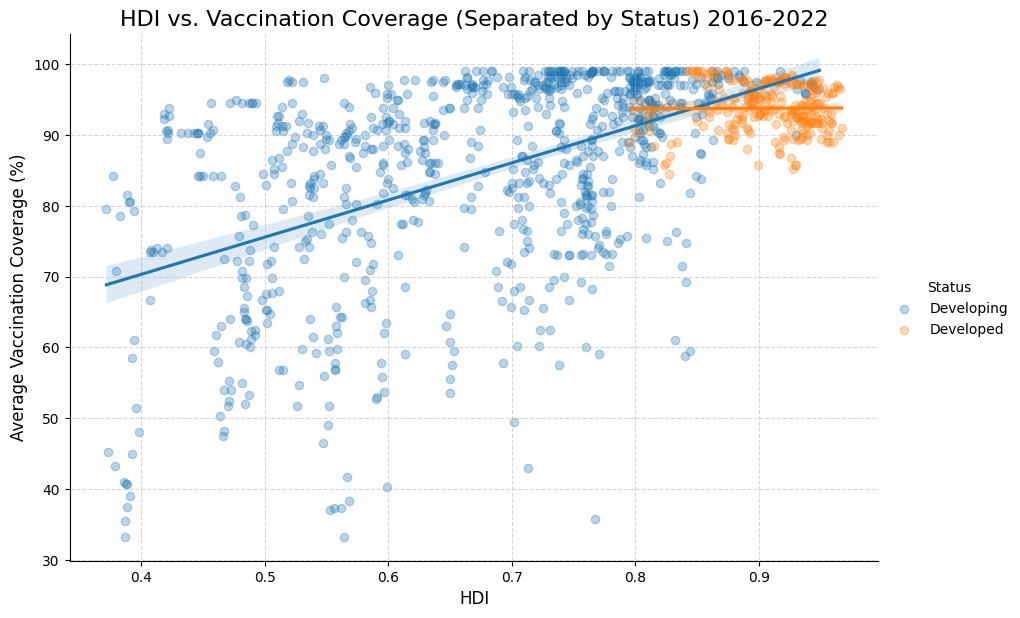

In [42]:
df_from_2016 = combined_df_with_status.loc[combined_df_with_status['Year'] >= 2016]

stats = df_from_2016.groupby('Status')[['hdi', 'average_vaccination']].corr().iloc[0::2, -1]
print("Correlation (HDI vs Vaccination):")
print(stats)


sns.lmplot(
    data=df_from_2016, 
    x='hdi', 
    y='average_vaccination', 
    hue='Status', 
    height=6, 
    aspect=1.5,
    scatter_kws={'alpha': 0.3}
)

plt.title('HDI vs. Vaccination Coverage (Separated by Status) 2016-2022', fontsize=16)
plt.xlabel('HDI', fontsize=12)
plt.ylabel('Average Vaccination Coverage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

Correlation (HDI vs Vaccination):
Country            
Australia       hdi   -0.091004
Austria         hdi   -0.479003
Belgium         hdi   -0.183638
Bulgaria        hdi    0.779249
Canada          hdi    0.640114
Croatia         hdi   -0.243847
Cyprus          hdi   -0.772786
Czechia         hdi    0.016188
Denmark         hdi    0.277451
Estonia         hdi   -0.882618
Finland         hdi   -0.351381
France          hdi    0.668379
Germany         hdi   -0.344897
Greece          hdi   -0.581048
Hungary         hdi         NaN
Iceland         hdi    0.375561
Ireland         hdi   -0.915446
Israel          hdi    0.598340
Italy           hdi    0.744046
Japan           hdi   -0.033677
Latvia          hdi    0.106883
Lithuania       hdi   -0.191708
Luxembourg      hdi    0.333333
Malta           hdi    0.555355
New Zealand     hdi   -0.713305
Norway          hdi    0.687596
Poland          hdi   -0.587948
Portugal        hdi    0.630491
Romania         hdi    0.115046
Slovenia        hd

C:\Users\Shir\AppData\Local\Temp\ipykernel_10044\2235601966.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


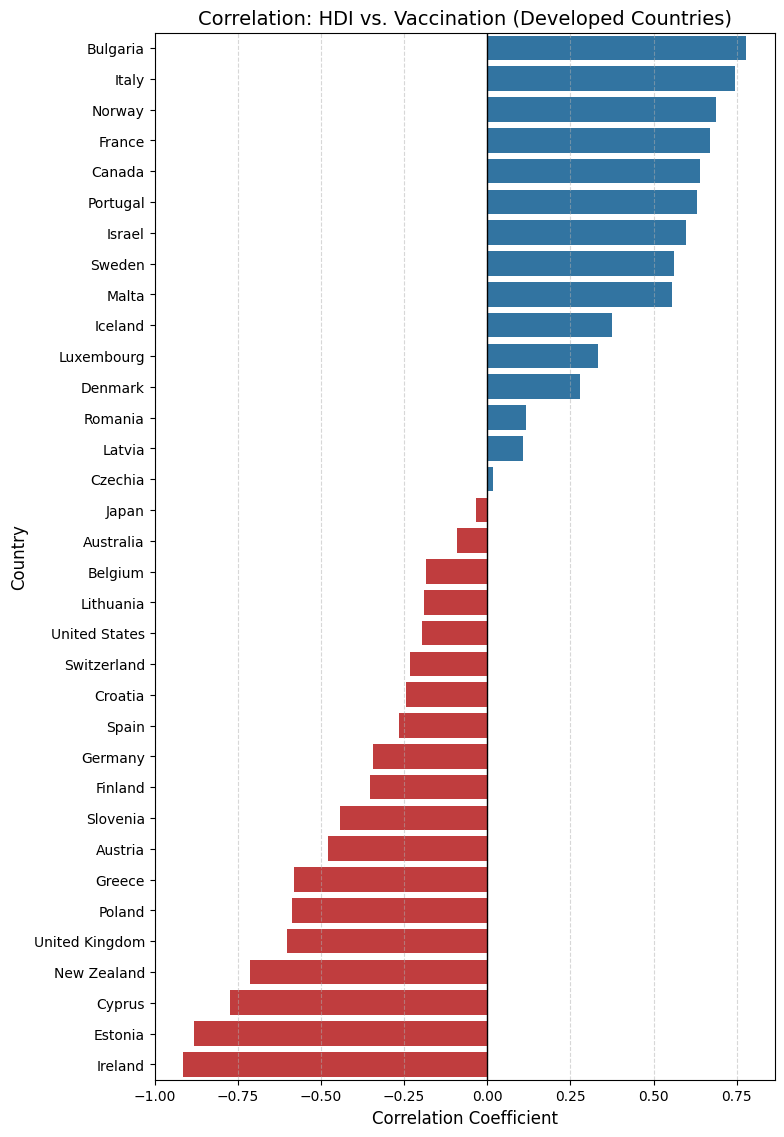

In [31]:
stats = df_from_2016.loc[df_from_2016["Status"] == "Developed"].groupby('Country')[['hdi', 'average_vaccination']].corr().iloc[0::2, -1]
print("Correlation (HDI vs Vaccination):")
print(stats)

# 1. Prepare the Data
# Your 'stats' variable is likely a Series with a MultiIndex. 
# We convert it to a clean DataFrame and sort it.
corr_df = stats.reset_index()

# Depending on your pandas version, the columns might need renaming.
# Assuming column 0 is 'Country' and the values are 'Correlation'
corr_df.columns = ['Country', 'Variable', 'Correlation'] # 'Variable' is the 'hdi' level we don't need
corr_df = corr_df[['Country', 'Correlation']].sort_values('Correlation', ascending=False)
corr_df = corr_df.dropna()

# 2. Plot
plt.figure(figsize=(8, len(corr_df) * 0.4))  # Auto-adjust height based on N countries

# Color bars by positive/negative value
colors = ['#1f77b4' if x > 0 else '#d62728' for x in corr_df['Correlation']]

sns.barplot(
    data=corr_df, 
    x='Correlation', 
    y='Country', 
    palette=colors  # Blue for positive, Red for negative
)

plt.title('Correlation: HDI vs. Vaccination (Developed Countries)', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.axvline(0, color='black', linewidth=1) # Add a vertical line at 0 for reference
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

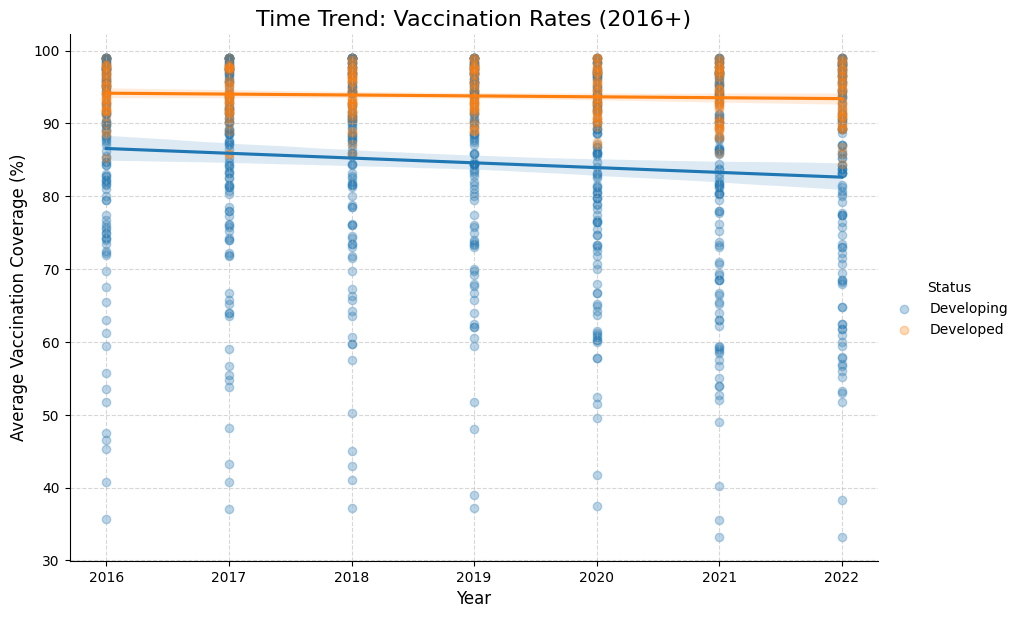

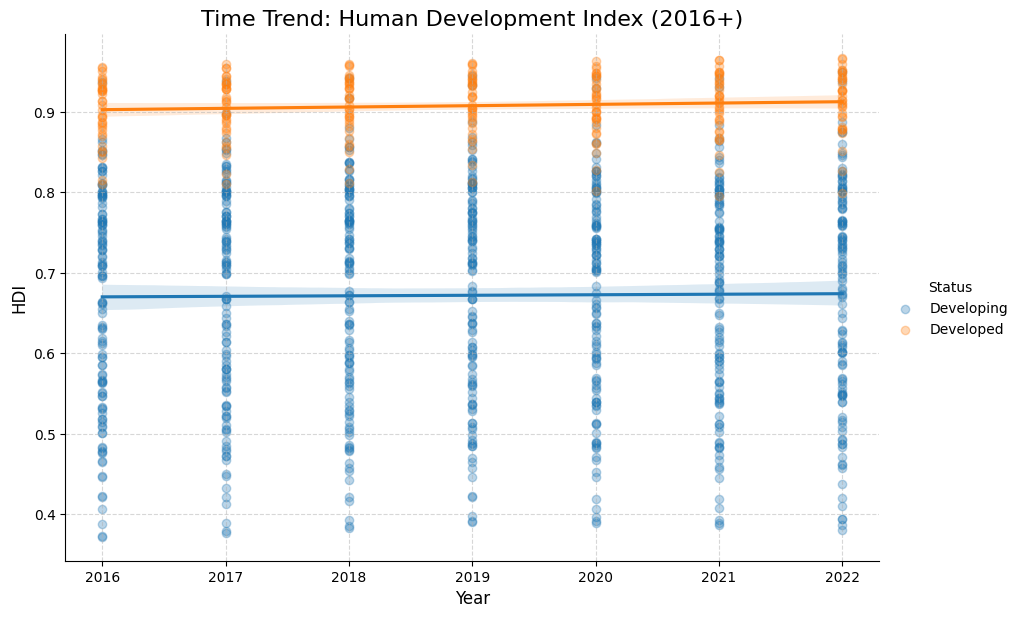

In [32]:

# Ensure your data is sorted by Year so the lines draw correctly
df_from_2016 = df_from_2016.sort_values('Year')

# --- PLOT 1: Year vs. Vaccination Rate ---
sns.lmplot(
    data=df_from_2016, 
    x='Year', 
    y='average_vaccination', 
    hue='Status', 
    height=6, 
    aspect=1.5,
    scatter_kws={'alpha': 0.3},
    # Optional: If year is an integer, this prevents decimal years on axis (2016.5)
    x_estimator=None 
)

plt.title('Time Trend: Vaccination Rates (2016+)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Vaccination Coverage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# --- PLOT 2: Year vs. HDI ---
sns.lmplot(
    data=df_from_2016, 
    x='Year', 
    y='hdi', 
    hue='Status', 
    height=6, 
    aspect=1.5,
    scatter_kws={'alpha': 0.3}
)

plt.title('Time Trend: Human Development Index (2016+)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('HDI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [39]:
df_status = df[['Country', 'Status']].drop_duplicates()

df_all_years_with_status = pd.merge(
    final_df, 
    df_status, 
    left_on=['Country'], 
    right_on=['Country'],
    how='left'
)

df_all_years_with_status = df_all_years_with_status[['Country', 'Year', 'average_vaccination', 'Status']]

print(df_all_years_with_status.head())



       Country  Year  average_vaccination      Status
0  Afghanistan  2000            25.000000  Developing
1  Afghanistan  2001            35.000000  Developing
2  Afghanistan  2002            35.666667  Developing
3  Afghanistan  2003            40.333333  Developing
4  Afghanistan  2004            49.333333  Developing


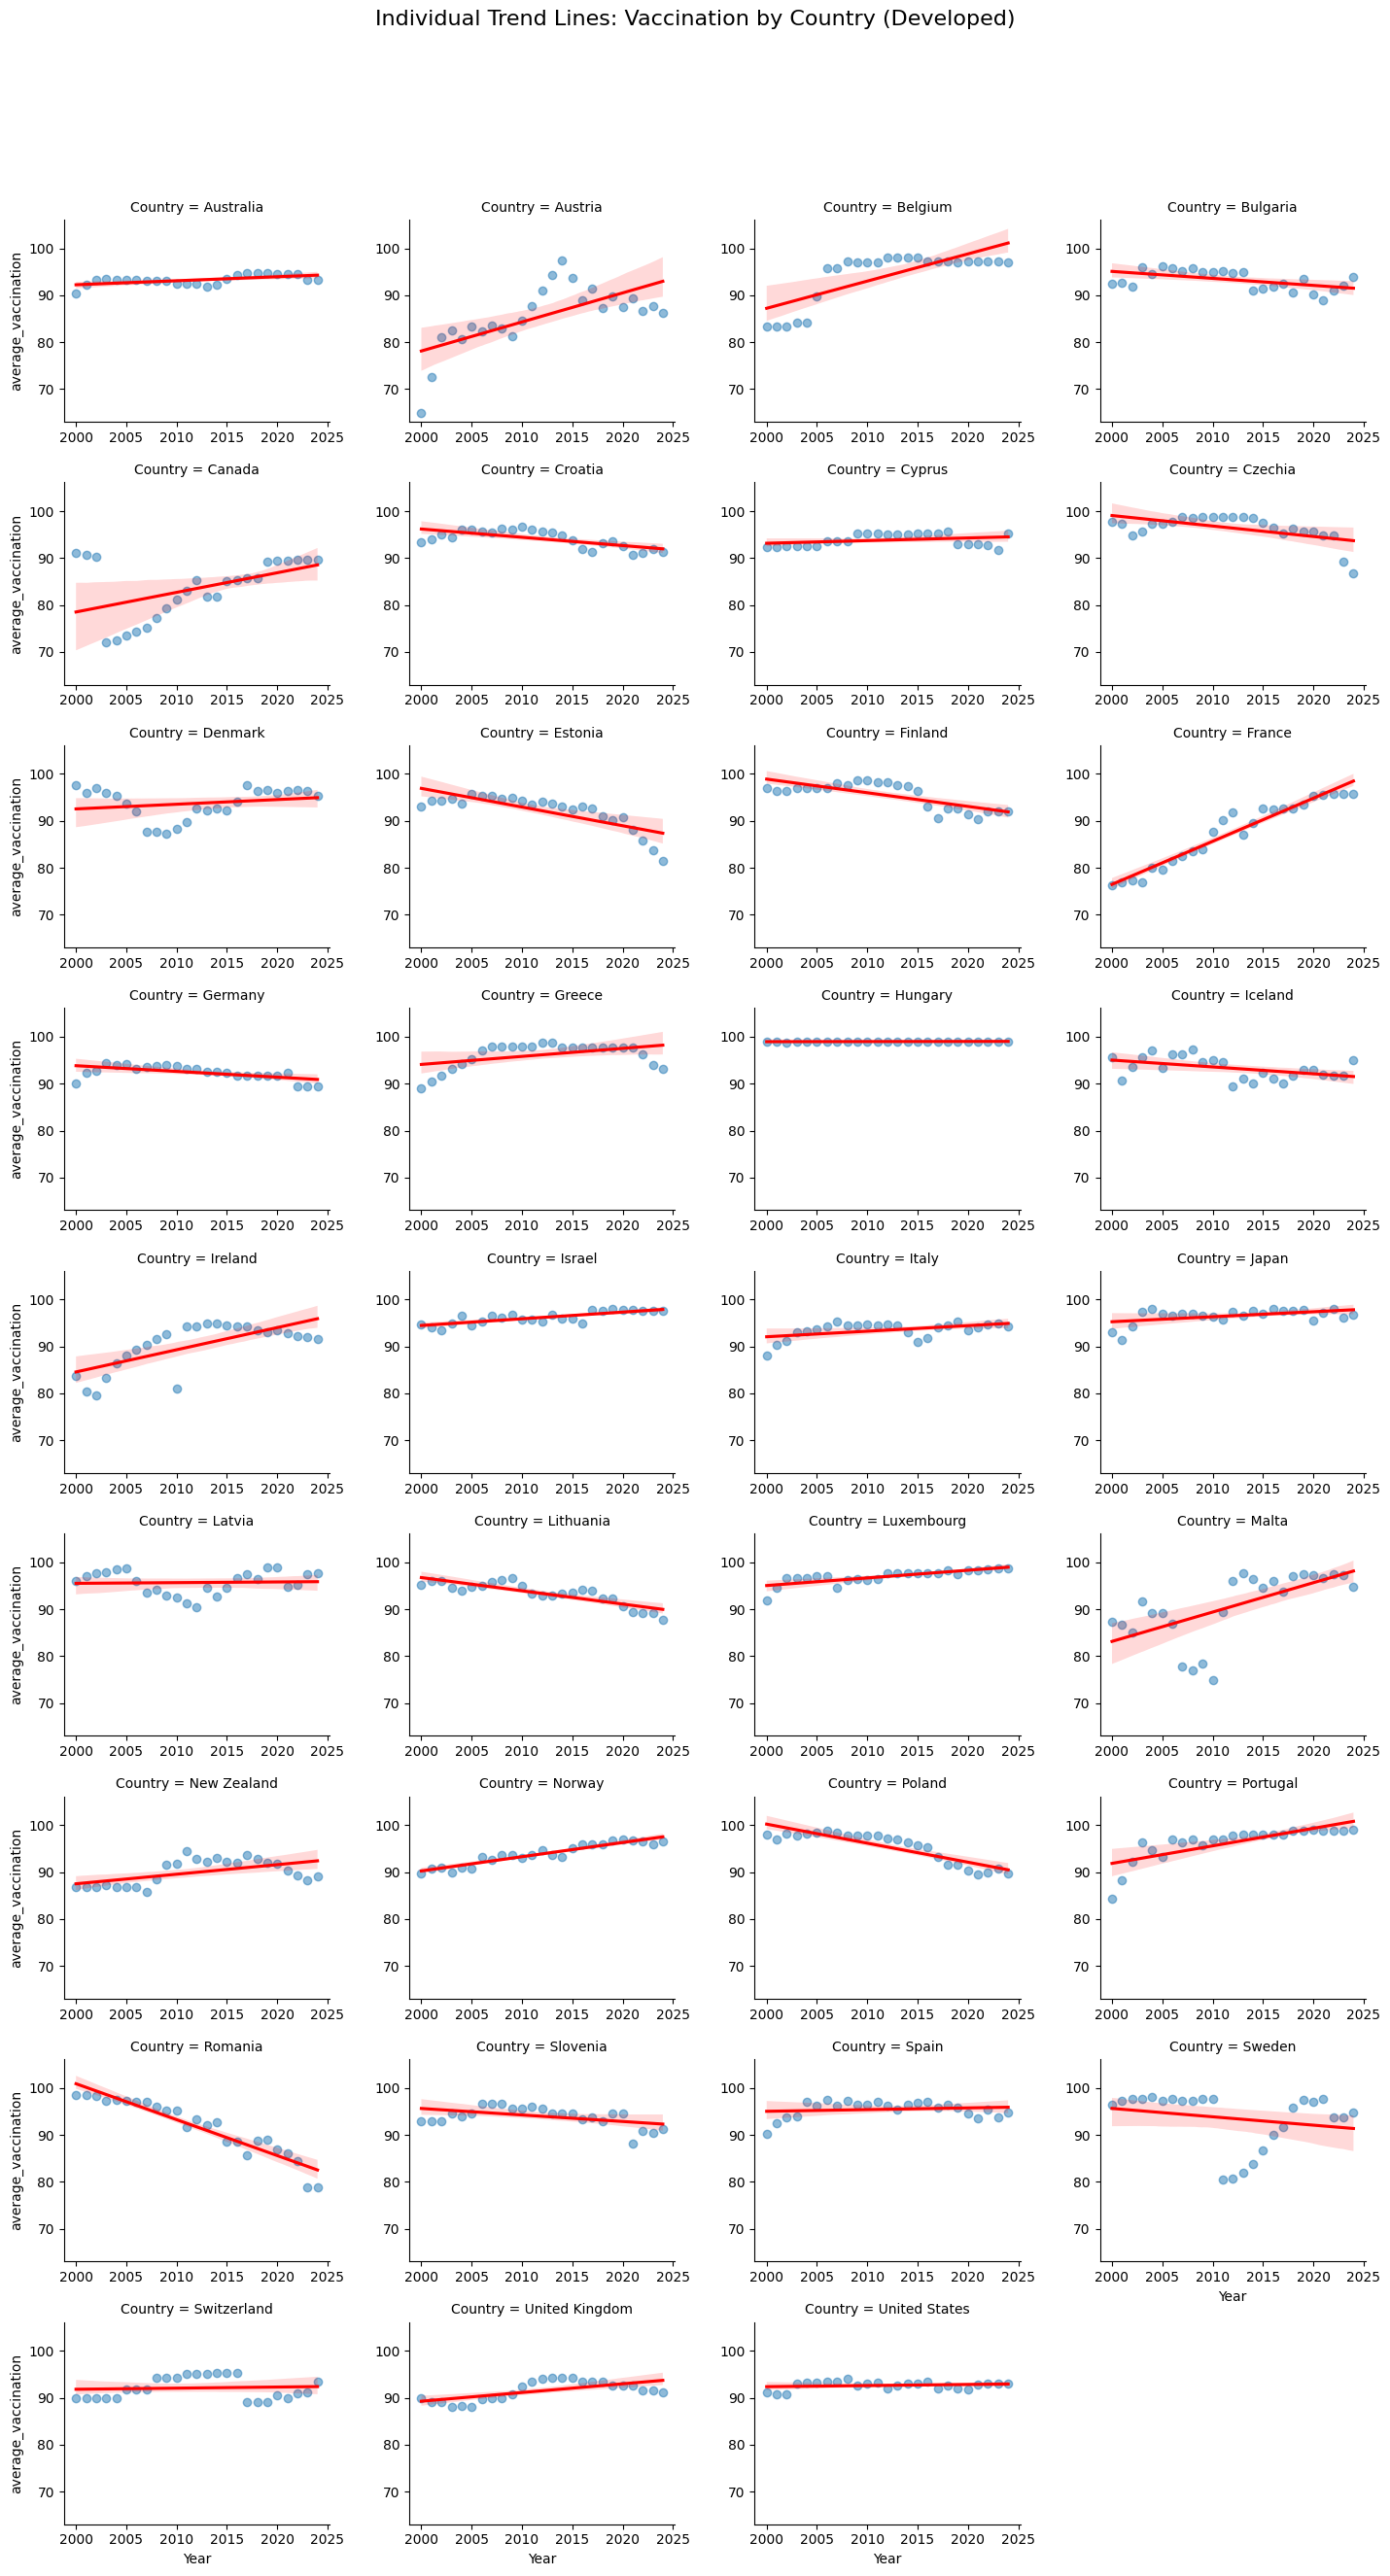

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_developed = df_all_years_with_status[df_all_years_with_status['Status'] == 'Developed'].copy()
df_developed['average_vaccination'] = df_developed['average_vaccination'].replace(0, np.nan)

g = sns.lmplot(
    data=df_developed, 
    x='Year', 
    y='average_vaccination', 
    col='Country', 
    col_wrap=4, 
    height=3, 
    aspect=1.2, 
    line_kws={'color': 'red'}, 
    scatter_kws={'alpha': 0.5}
)


for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True, labelleft=True)

# Adjust title and spacing
plt.subplots_adjust(top=0.9, hspace=0.3, wspace=0.3) 
plt.suptitle('Individual Trend Lines: Vaccination by Country (Developed)', fontsize=16)
plt.show()

Figure above shows no noticable change during COVID-19 years